# Part I - General Questions

### Imports

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

# I. Data

In [2]:
df_train = pd.read_csv('data/Corona_NLP_train.csv' , encoding = 'latin_1')
df_val = pd.read_csv('data/Corona_NLP_test.csv' , encoding = 'latin_1')

In [3]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df_val.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [5]:
training = df_train[['OriginalTweet', 'Sentiment']]
validation = df_val[['OriginalTweet', 'Sentiment']]

### Check Missing Values

In [6]:
training.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [7]:
validation.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

# II. Descriptive Statistics

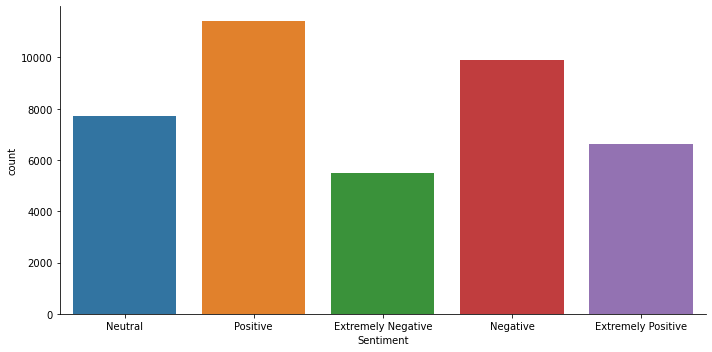

In [8]:
sns.catplot(
    x='Sentiment',
    kind='count',
    data=training,
    height=5, 
    aspect=2
)

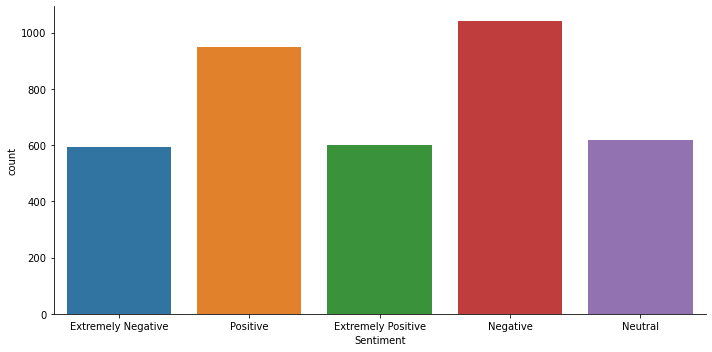

In [9]:
sns.catplot(x = 'Sentiment', kind = 'count', data = validation, height = 5, aspect = 2)

# III. Sentiments in Time

In [10]:
df_train['Month'] = pd.DatetimeIndex(df_train['TweetAt'])

counts = df_train["Month"].value_counts().sort_values(ascending=False)

df_train_month = df_train.loc[df_train["Month"].isin(counts.index)]
df_train_month = df_train.groupby(by=["Month","Sentiment"])["OriginalTweet"].count().reset_index(name="Count")

In [13]:
px.bar(df_train_month, x='Month', y='Count', color='Sentiment', 
             title="Sentiment Distribution in Time", 
             category_orders={
                 "Month": ["January", "February", "March", "April", "May", "June", "July", "September",
                          "October", "November", "December"], 
                 "Sentiment": ["Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive"]
             }
        )

# IV. Word Cloud

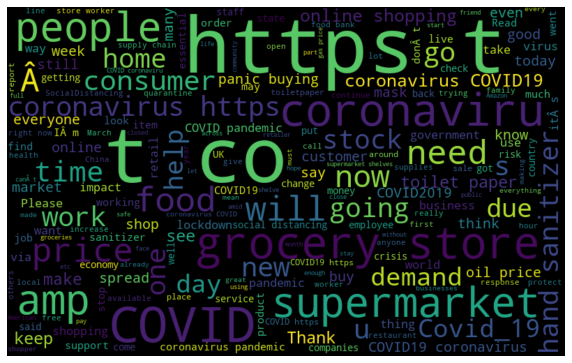

In [12]:
all_words = ' '.join([text for text in df_train['OriginalTweet']])
wordcloud = WordCloud(
    width=800,
    height=500,
    random_state=42,
    max_font_size=110
).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()